# Import libraries

In [96]:
import re
import string
from transformers import pipeline
from matplotlib import pyplot as plt

In [2]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


# Read file

In [6]:
file_path = '/Users/nvelraj/Desktop/project/medDevices/pdfs/2023/april/K193514.txt'
file = open(file_path, 'r')

# Read the contents of the file
file_contents = file.read()

# Close the file
file.close()

# Print the contents of the file
print(file_contents)

April 13, 2023
ARKRAY Inc.
Daya Ranamukhaarachchi
VP/Scientific and Regulatory Affairs
5198 West 76th Street
Minneapolis, MN 55439


Re: K193514
    Trade/Device Name: AUTION MAX AX-4060 Urinalysis System
    Regulation Number: 21 CFR 862.1340
    Regulation Name: Urinary glucose (nonquantitative) test system
    Regulatory Class: Class II
    Product Code: JIL, JIO, KQO, CDM, JIR, JMT, LJX, JJB, CEN, JIN
    Dated: October 19, 2022
    Received: October 20, 2022

Dear Daya Ranamukhaarachchi:

We have reviewed your Section 510(k) premarket notification of intent to market the device referenced
above and have determined the device is substantially equivalent (for the indications for use stated in the
enclosure) to legally marketed predicate devices marketed in interstate commerce prior to May 28, 1976, the
enactment date of the Medical Device Amendments, or to devices that have been reclassified in accordance
with the provisions of the Federal Food, Drug, and Cosmetic Act (Act) that do 

In [87]:
def split_text_by_page_numbers(file_contents, pattern):
    # Split the text based on page numbers
    split_text = re.split(pattern, file_contents)
    # Remove empty strings from the split result
    split_text = [text.strip() for text in split_text if text.strip()]
    # remove multiple empty space characters
    split_text = [re.sub(' +', ' ', text) for text in split_text]
    meaningful_text = [text for text in split_text if len(text) > 500]
    return meaningful_text

In [88]:
pattern = r'Page\s+(\d+)\s+of\s+(\d+)'

In [89]:
meaningful_text = split_text_by_page_numbers(file_contents, pattern)

In [90]:
lengths = [len(text) for text in meaningful_text]

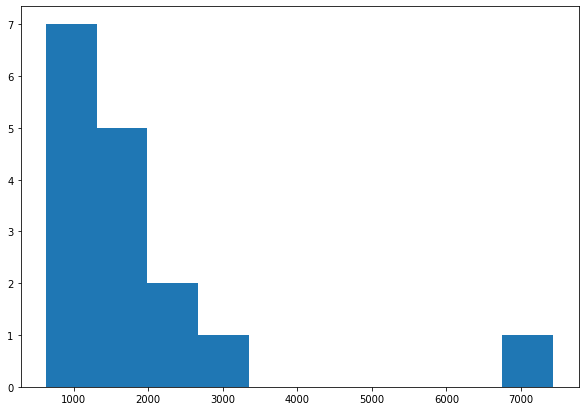

In [91]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(lengths)
 
# Show plot
plt.show()

In [213]:
def trim_long_pages(page, max_page_length):
    curr_page_len = len(page)
    sub_pages = []
    if curr_page_len > max_page_length:
        while curr_page_len>max_page_length:
            sub_page_final_period_index = page.find(".", max_page_length, -1)
            if sub_page_final_period_index != -1: 
                sub_pages.append(page[:sub_page_final_period_index+1])
                page = page[sub_page_final_period_index+2:]
                curr_page_len = len(page)
            else:
                sub_pages.append(page[sub_page_final_period_index+1:])
                break
    else: 
        sub_pages.append(page)
    return sub_pages

In [228]:
doc_summarized_content = []
for page in meaningful_text:
    sub_pages = trim_long_pages(page, 1500)
    summarized_page = []
    for sub_page in sub_pages:
        summarized_page.append(summarizer(sub_page, do_sample=False)[0]["summary_text"])
    doc_summarizeable_content.append(summarized_page)